## StackView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This `Op` wraps the `Views.stack()` method of ImgLib2, taking multiple n-dimensional `RandomAccessibleInterval`s and stacking them to form a single (n+1)-dimensional `RandomAccessibleInterval`.

In [2]:
ij.op().help('stackView')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.stackView.DefaultStackView(
		List in)
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.stackView.StackViewWithAccessMode(
		List in,
		StackAccessMode stackAccessMode)

We are interested in the first of the two, for this notebook. To create the stack we need two `Img`s, which we can create using [`equation`](../image/equation.ipynb)

In [3]:
import net.imglib2.FinalInterval
import net.imglib2.img.Img
import net.imglib2.type.numeric.integer.UnsignedByteType

dims = new FinalInterval(200, 150)

imgList = new ArrayList<Img>()

input1 = ij.op().create().img(dims, new UnsignedByteType())
equation1 = "127 * Math.sin(p[0] / 4) + 128"
ij.op().run("equation", input1, equation1)
input2 = ij.op().create().img(dims, new UnsignedByteType())
equation2 = "127 * Math.cos(p[1] / 4) + 128"
ij.op().run("equation", input2, equation2)

imgList.add(input1)
imgList.add(input2)

//TODO show side by side

true

We can stack them by passing both into `Views.stack()`:

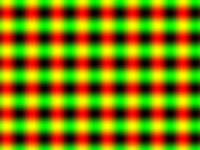

In [4]:
import net.imglib2.view.Views

stack = ij.op().run("stackView", imgList)

ij.notebook().display(stack)